# High Mutation Donation Game Perfect and Limited Memory 

**Imports**

In [1]:
import pandas as pd

import numpy as np

import glob as glod


import matplotlib.pyplot as plt

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 12,
        }

In [9]:
matplotlib.rc('font', **font)

In [10]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")

**Reading data**

In [2]:
mutation_rates = [0.0001, 0.001, 0.01, 0.1, 1]

In [3]:
data_perfect = []

for mutation_r in mutation_rates:
    coops = [pd.read_csv(f"../to_archieve/mutation/mutation_expected_mutation_{mutation_r}_run_{i}cooperations.csv",
               names=['coop']) for i in range(1, 5)]


    data_perfect .append(pd.concat(coops)['coop'].mean())

In [4]:
data_limited = []

for mutation_r in mutation_rates:
    coops = [pd.read_csv(f"../to_archieve/mutation/mutation_last_round_mutation_{mutation_r}_run_{i}cooperations.csv",
               names=['coop']) for i in range(1, 5)]


    data_limited.append(pd.concat(coops)['coop'].mean())

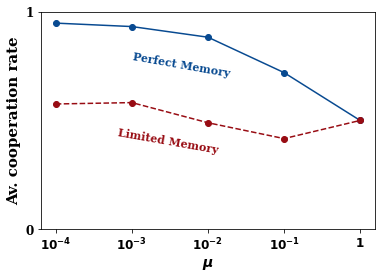

In [43]:
fig, axes = plt.subplots()

axes.plot([i for i, _ in enumerate(mutation_rates)], data_perfect, "-o", color=blues(0.9));
axes.plot([i for i, _ in enumerate(mutation_rates)], data_limited, "--o", color=reds(.9));

axes.set_ylim(0, 1);
axes.set_xlabel(r'$\mu$', weight="bold", fontsize=14);

axes.text(1, .7, "Perfect Memory", fontsize=11, color=blues(.9), rotation=-10)
axes.text(.8, .35, "Limited Memory", fontsize=11, color=reds(.9), rotation=-10)

axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels([r"$10^{-4}$", 
                      r"$10^{-3}$", 
                      r"$10^{-2}$",
                      r"$10^{-1}$", 
                      r"$1$"]);

axes.set_yticks([0, 1]);
axes.set_ylabel('Av. cooperation rate', weight="bold", fontsize=15);

plt.savefig("../paper/static/mutation_perfect_and_limited_memory_donation_game.pdf")